In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

In [15]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [17]:
from pandas_datareader import data as pdr

In [18]:
from datetime import datetime

In [19]:
from __future__ import division

In [20]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [21]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [22]:
for stock in tech_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

In [23]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,157.990040,154.274365,156.051944,156.196468,8.925227e+07,155.802892
std,12.801501,12.463081,12.695155,12.636845,2.673096e+07,12.638302
min,132.389999,129.039993,130.070007,130.059998,4.100000e+07,130.059998
25%,147.769997,145.232498,146.197498,146.357502,7.038242e+07,145.888504
50%,154.675003,150.510002,152.235001,152.284996,8.525175e+07,151.900703
75%,169.727493,165.512501,167.607498,166.727497,1.034016e+08,166.482895
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


<AxesSubplot:xlabel='Date'>

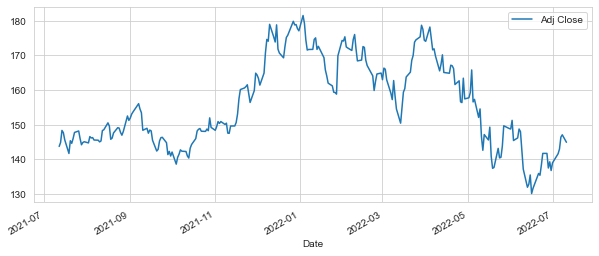

In [34]:
# Historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

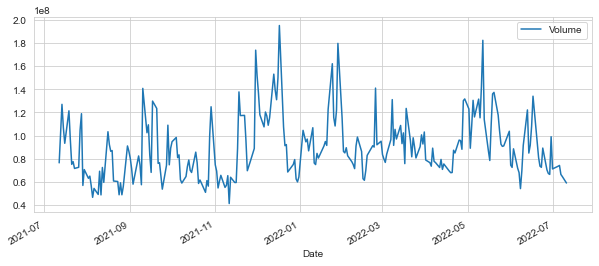

In [35]:
# The total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

In [36]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

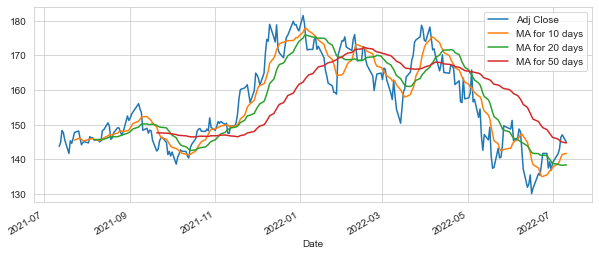

In [27]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value.

<AxesSubplot:xlabel='Date'>

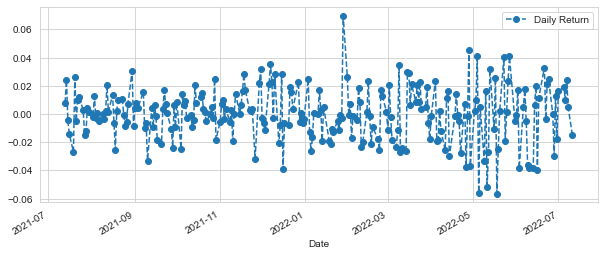

In [37]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

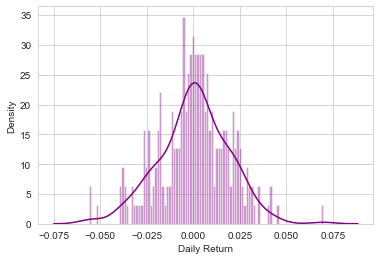

In [38]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

<AxesSubplot:>

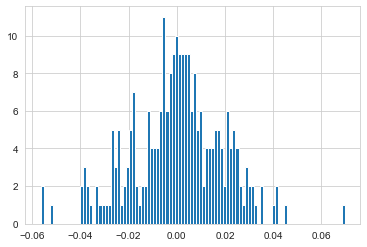

In [39]:
AAPL['Daily Return'].hist(bins=100)

In [40]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

In [41]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-12,143.679123,2611.280029,275.073883,185.927505
2021-07-13,144.812653,2619.889893,278.704193,183.867996
2021-07-14,148.302704,2641.649902,280.221863,184.084000
2021-07-15,147.636505,2625.330078,278.753815,181.559998
2021-07-16,145.558395,2636.909912,278.476105,178.681503


In [42]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

In [43]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-12,NaN,NaN,NaN,NaN
2021-07-13,0.007889,0.003297,0.013198,-0.011077
2021-07-14,0.024100,0.008306,0.005445,0.001175
2021-07-15,-0.004492,-0.006178,-0.005239,-0.013711
2021-07-16,-0.014076,0.004411,-0.000996,-0.015854


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


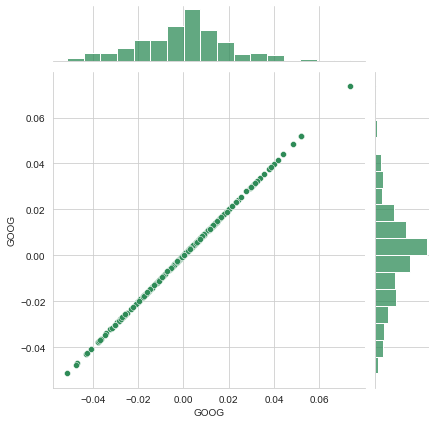

In [44]:
sns.jointplot('GOOG','GOOG',tech_rets,kind= 'scatter',color='seagreen')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


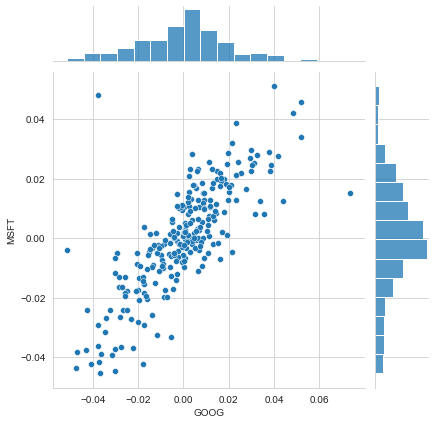

In [45]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [46]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-12,NaN,NaN,NaN,NaN
2021-07-13,0.007889,0.003297,0.013198,-0.011077
2021-07-14,0.024100,0.008306,0.005445,0.001175
2021-07-15,-0.004492,-0.006178,-0.005239,-0.013711
2021-07-16,-0.014076,0.004411,-0.000996,-0.015854


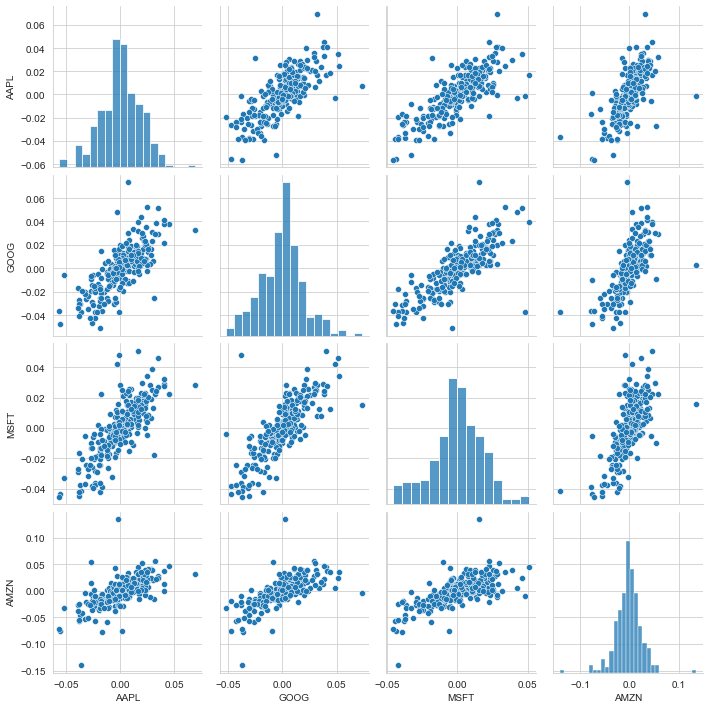

In [47]:
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. We will use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

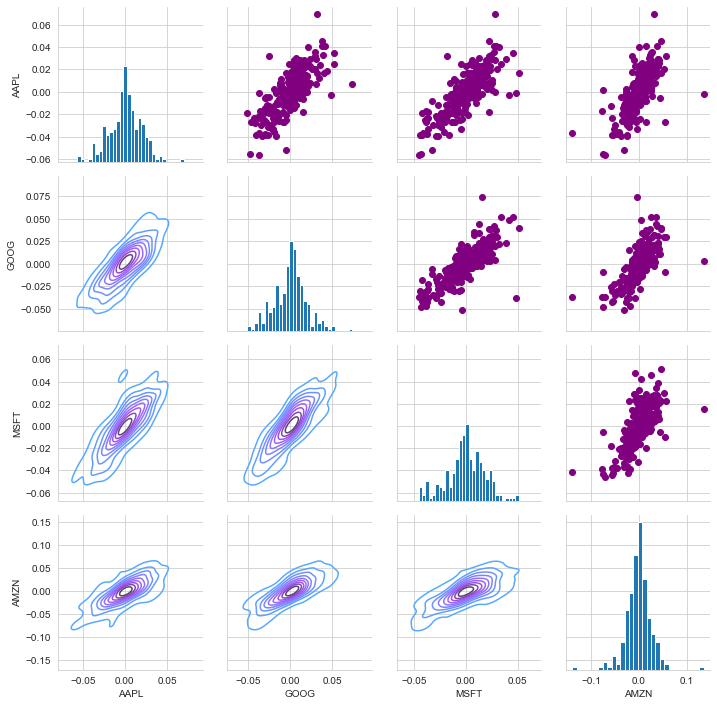

In [49]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

### Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

In [54]:
rets = tech_rets.dropna()

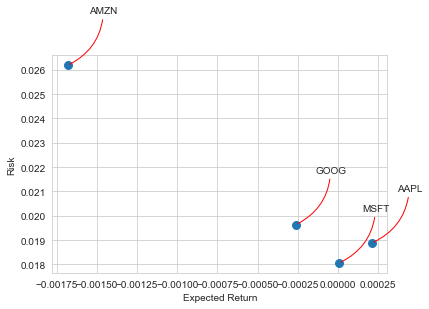

In [55]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext= (50,50),
        textcoords = 'offset points', ha = 'right', va='bottom',
        arrowprops = dict(arrowstyle = '-', color= 'red', connectionstyle = 'arc3, rad=-0.3'))

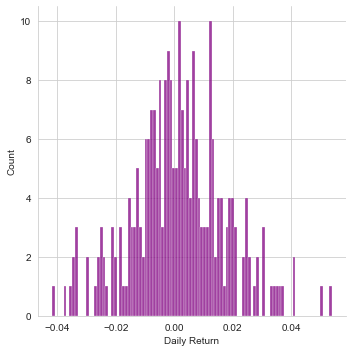

In [78]:
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [79]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-11-03,0.015354,0.014871,0.020264,0.014621
2020-11-04,0.040837,0.059944,0.048249,0.063230
2020-11-05,0.035494,0.008141,0.031887,0.024942
2020-11-06,-0.001136,-0.000919,0.001926,-0.003200
2020-11-09,-0.019968,0.000710,-0.023824,-0.050623


In [80]:
rets['AAPL'].quantile(0.05)

-0.02519163663762657

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [64]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns

In [65]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [66]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-12,2615.399902,2592.000000,2596.669922,2611.280029,847200,2611.280029
2021-07-13,2640.840088,2612.739990,2617.629883,2619.889893,830900,2619.889893
2021-07-14,2659.919922,2637.959961,2638.030029,2641.649902,895600,2641.649902
2021-07-15,2651.899902,2611.959961,2650.000000,2625.330078,829300,2625.330078
2021-07-16,2643.659912,2616.429932,2632.820068,2636.909912,742800,2636.909912


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

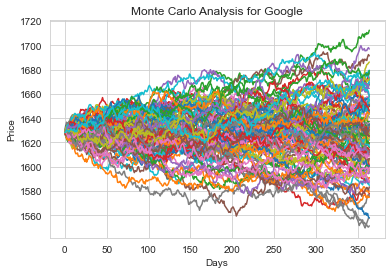

In [67]:
start_price = 1628.16 

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [68]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use quantile to define our risk for this stock.

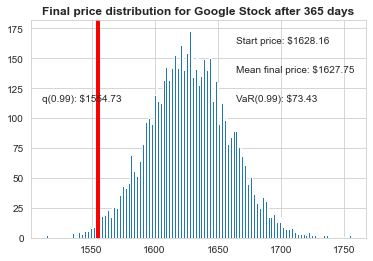

In [70]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $18.38 for every investment of 569.85 (the price of one inital google stock).

This basically means for every initial stock you purchase your putting about $18.38 at risk 99% of the time from our Monte Carlo Simulation.